In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.signal import decimate
from scipy.stats import sem
import os

pfc2hpc = [f for f in os.listdir() if '.npy' in f and 'R1toR2' in f]
pfc2hpc

['VR5_Vehicle R1toR2_GCestimates_byTrial PFC-HPC_Rside Unrewarded.npy',
 'VR5_ChABC R1toR2_GCestimates_byTrial PFC-HPC_Rside Unrewarded.npy',
 'VR5_Vehicle R1toR2_GCestimates_byTrial PFC-HPC_Rside Rewarded.npy',
 'VR5_ChABC R1toR2_GCestimates_byTrial PFC-HPC_Rside Rewarded.npy']

In [2]:
veh_unrw = np.load(pfc2hpc[0], allow_pickle=True).T
abc_unrw = np.load(pfc2hpc[1], allow_pickle=True).T
veh_rew = np.load(pfc2hpc[2], allow_pickle=True).T
abc_rew = np.load(pfc2hpc[3], allow_pickle=True).T

def baseline_norm(A):
    A = decimate(A, q=5)
    return np.array(A) / np.mean(A[:50])

In [46]:
print(np.shape(veh_rew))
t

(12, 1050)


array([-0.85, -0.84, -0.83, -0.82, -0.81, -0.8 , -0.79, -0.78, -0.77,
       -0.76, -0.75, -0.74, -0.73, -0.72, -0.71, -0.7 , -0.69, -0.68,
       -0.67, -0.66, -0.65, -0.64, -0.63, -0.62, -0.61, -0.6 , -0.59,
       -0.58, -0.57, -0.56, -0.55, -0.54, -0.53, -0.52, -0.51, -0.5 ,
       -0.49, -0.48, -0.47, -0.46, -0.45, -0.44, -0.43, -0.42, -0.41,
       -0.4 , -0.39, -0.38, -0.37, -0.36, -0.35, -0.34, -0.33, -0.32,
       -0.31, -0.3 , -0.29, -0.28, -0.27, -0.26, -0.25, -0.24, -0.23,
       -0.22, -0.21, -0.2 , -0.19, -0.18, -0.17, -0.16, -0.15, -0.14,
       -0.13, -0.12, -0.11, -0.1 , -0.09, -0.08, -0.07, -0.06, -0.05,
       -0.04, -0.03, -0.02, -0.01,  0.  ,  0.01,  0.02,  0.03,  0.04,
        0.05,  0.06,  0.07,  0.08,  0.09,  0.1 ,  0.11,  0.12,  0.13,
        0.14,  0.15,  0.16,  0.17,  0.18,  0.19,  0.2 ,  0.21,  0.22,
        0.23,  0.24,  0.25,  0.26,  0.27,  0.28,  0.29,  0.3 ,  0.31,
        0.32,  0.33,  0.34,  0.35,  0.36,  0.37,  0.38,  0.39,  0.4 ,
        0.41,  0.42,

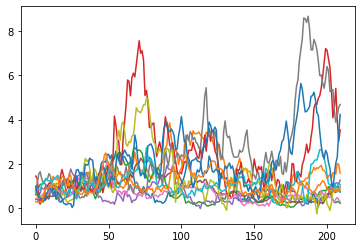

In [62]:
veh_rew_bline = []
for trace in veh_rew:
    t = baseline_norm(trace)
    veh_rew_bline.append(t)
    plt.plot(t)
    

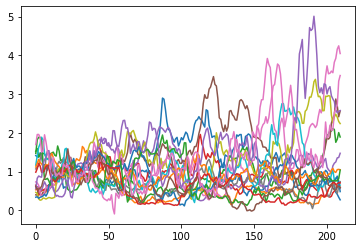

In [63]:
abc_rew_bline = []
for trace in abc_rew:
    t = baseline_norm(trace)
    abc_rew_bline.append(t)
    plt.plot(t)

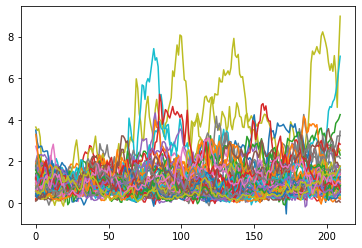

In [100]:
veh_unrw_bline = []
for trace in veh_unrw:
    t = baseline_norm(trace)
    veh_unrw_bline.append(t)
    plt.plot(t)

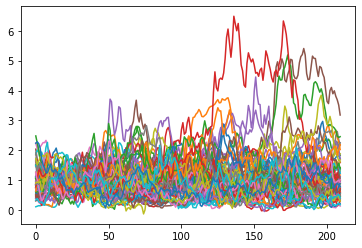

In [101]:
abc_unrw_bline = []
for trace in abc_unrw:
    t = baseline_norm(trace)
    abc_unrw_bline.append(t)
    plt.plot(t)

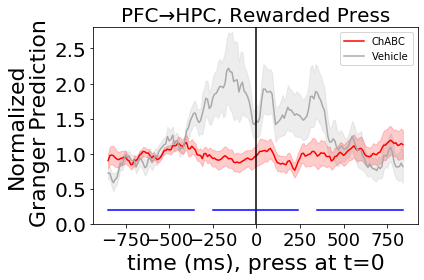

In [119]:
from scipy.stats import sem

veh_rw_gc = []
veh_rw_gc_sem = []
for timepoint in np.array(veh_rew_bline).T:
    veh_rw_gc.append(np.mean(timepoint))
    veh_rw_gc_sem.append(sem(timepoint))

abc_rw_gc = []
abc_rw_gc_sem = []
for timepoint in np.array(abc_rew_bline).T:
    abc_rw_gc.append(np.mean(timepoint))
    abc_rw_gc_sem.append(sem(timepoint))
    

fs = 100
t = np.arange(-0.85,1.25, 1/fs)*1000
t = np.round(t,2)

plt.plot(t[0:170], abc_rw_gc[0:170], c='r', label='ChABC')
plt.plot(t[0:170], veh_rw_gc[0:170], c='darkgray', label='Vehicle')
plt.title('PFC→HPC, Rewarded Press', fontsize=20)
plt.axvline(x=0, c='k')
plt.xlabel('time (ms), press at t=0', fontsize=22)
plt.xticks(range(-750,751, 250), fontsize=18)
plt.ylabel('Normalized\n Granger Prediction', fontsize=22)
plt.yticks(fontsize=20)
plt.ylim(0,2.8)
plt.plot(t[0:50], [0.2]*50, c='b')
plt.plot(t[85-25:85+25], [0.2]*50, c='b')
plt.plot(t[85+35:85+85], [0.2]*50, c='b')
plt.fill_between(t[0:170], np.array(veh_rw_gc)[0:170]+(-1*np.array(veh_rw_gc_sem)[0:170]), np.array(veh_rw_gc)[0:170]+np.array(veh_rw_gc_sem)[0:170], color='darkgray', alpha=0.20)
plt.fill_between(t[0:170], np.array(abc_rw_gc)[0:170]+(-1*np.array(abc_rw_gc_sem)[0:170]), np.array(abc_rw_gc)[0:170]+np.array(abc_rw_gc_sem)[0:170], color='r', alpha=0.20)
plt.legend()
plt.tight_layout()
plt.savefig('VR5_timedomain_GrangerCausality_RewardedPress_GC_MEANS.png', dpi=600)

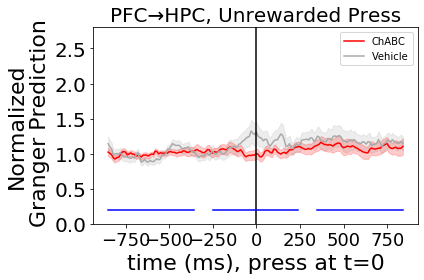

In [120]:
from scipy.stats import sem

veh_unrw_gc = []
veh_unrw_gc_sem = []
for timepoint in np.array(veh_unrw_bline).T:
    veh_unrw_gc.append(np.mean(timepoint))
    veh_unrw_gc_sem.append(sem(timepoint))

abc_unrw_gc = []
abc_unrw_gc_sem = []
for timepoint in np.array(abc_unrw_bline).T:
    abc_unrw_gc.append(np.mean(timepoint))
    abc_unrw_gc_sem.append(sem(timepoint))
    

fs = 100
t = np.arange(-0.85,1.25, 1/fs)*1000
t = np.round(t,2)

plt.plot(t[0:170], abc_unrw_gc[0:170], c='r', label='ChABC')
plt.plot(t[0:170], veh_unrw_gc[0:170], c='darkgray', label='Vehicle')
plt.title('PFC→HPC, Unrewarded Press', fontsize=20)
plt.axvline(x=0, c='k')
plt.xlabel('time (ms), press at t=0', fontsize=22)
plt.xticks(range(-750,751, 250), fontsize=18)
plt.ylabel('Normalized\n Granger Prediction', fontsize=22)
plt.yticks(fontsize=20)
plt.ylim(0,2.8)
plt.plot(t[0:50], [0.2]*50, c='b')
plt.plot(t[85-25:85+25], [0.2]*50, c='b')
plt.plot(t[85+35:85+85], [0.2]*50, c='b')
plt.fill_between(t[0:170], np.array(veh_unrw_gc)[0:170]+(-1*np.array(veh_unrw_gc_sem)[0:170]), np.array(veh_unrw_gc)[0:170]+np.array(veh_unrw_gc_sem)[0:170], color='darkgray', alpha=0.20)
plt.fill_between(t[0:170], np.array(abc_unrw_gc)[0:170]+(-1*np.array(abc_unrw_gc_sem)[0:170]), np.array(abc_unrw_gc)[0:170]+np.array(abc_unrw_gc_sem)[0:170], color='r', alpha=0.20)
plt.legend()
plt.tight_layout()
plt.savefig('VR5_timedomain_GrangerCausality_UnrewardedPress_GC_MEANS.png',dpi=600)

In [111]:
# t for more intuitive indices
fs = 100
t = np.arange(-0.85,1.25, 1/fs)
t = np.round(t,2)

# init
pre_bytrial = []
press_bytrial = []
post_bytrial = []
trial_id = []

for i, trial in enumerate(veh_rew):
    # norm, decimate
    trial = baseline_norm(trial)
    
    # get means
    pre = np.mean(trial[np.where(t == -0.85)[0][0]:np.where(t == -0.35)[0][0]])
    press = np.mean(trial[np.where(t == -0.25)[0][0]:np.where(t == 0.25)[0][0]])
    post = np.mean(trial[np.where(t == 0.35)[0][0]:np.where(t == 0.85)[0][0]])
    
    # toss into list
    pre_bytrial.append(pre)
    press_bytrial.append(press)
    post_bytrial.append(post)
    trial_id.append(f'veh_trial_{i}')
    
df_pre = pd.DataFrame()
df_pre['trial_id'] = trial_id
df_pre['treatment'] = 'veh'
df_pre['time'] = 'pre'
df_pre['mean_GC'] = pre_bytrial

df_press = pd.DataFrame()
df_press['trial_id'] = trial_id
df_press['treatment'] = 'veh'
df_press['time'] = 'press'
df_press['mean_GC'] = press_bytrial

df_post = pd.DataFrame()
df_post['trial_id'] = trial_id
df_post['treatment'] = 'veh'
df_post['time'] = 'post'
df_post['mean_GC'] = post_bytrial

veh = pd.concat([df_pre, df_press, df_post])

In [112]:
print(np.average(veh[veh.time == 'pre'].mean_GC))
print(np.average(veh[veh.time == 'press'].mean_GC))
print(np.average(veh[veh.time == 'post'].mean_GC))

1.0
1.7697480863025568
1.0742894535092207


In [113]:
# t for more intuitive indices
fs = 100
t = np.arange(-0.85,1.25, 1/fs)
t = np.round(t,2)

# init
pre_bytrial = []
press_bytrial = []
post_bytrial = []
trial_id = []

for i, trial in enumerate(abc_rew):
    # norm, decimate
    trial = baseline_norm(trial)
    
    # get means
    pre = np.mean(trial[np.where(t == -0.85)[0][0]:np.where(t == -0.35)[0][0]])
    press = np.mean(trial[np.where(t == -0.25)[0][0]:np.where(t == 0.25)[0][0]])
    post = np.mean(trial[np.where(t == 0.35)[0][0]:np.where(t == 0.85)[0][0]])
    
    # toss into list
    pre_bytrial.append(pre)
    press_bytrial.append(press)
    post_bytrial.append(post)
    trial_id.append(f'abc_trial_{i}')
    
df_pre = pd.DataFrame()
df_pre['trial_id'] = trial_id
df_pre['treatment'] = 'abc'
df_pre['time'] = 'pre'
df_pre['mean_GC'] = pre_bytrial

df_press = pd.DataFrame()
df_press['trial_id'] = trial_id
df_press['treatment'] = 'abc'
df_press['time'] = 'press'
df_press['mean_GC'] = press_bytrial

df_post = pd.DataFrame()
df_post['trial_id'] = trial_id
df_post['treatment'] = 'abc'
df_post['time'] = 'post'
df_post['mean_GC'] = post_bytrial

abc = pd.concat([df_pre, df_press, df_post])

In [114]:
print(np.average(abc[abc.time == 'pre'].mean_GC))
print(np.average(abc[abc.time == 'press'].mean_GC))
print(np.average(abc[abc.time == 'post'].mean_GC))

1.0
0.9245609127939376
1.0383712755284198


In [115]:
rew = pd.concat([veh, abc])
rew.to_csv('VR5_PFCtoHPC_GCmeans_rewarded.csv')

In [116]:
# t for more intuitive indices
fs = 100
t = np.arange(-0.85,1.25, 1/fs)
t = np.round(t,2)

# init
pre_bytrial = []
press_bytrial = []
post_bytrial = []
trial_id = []

for i, trial in enumerate(veh_unrw):
    # norm, decimate
    trial = baseline_norm(trial)
    
    # get means
    pre = np.mean(trial[np.where(t == -0.85)[0][0]:np.where(t == -0.35)[0][0]])
    press = np.mean(trial[np.where(t == -0.25)[0][0]:np.where(t == 0.25)[0][0]])
    post = np.mean(trial[np.where(t == 0.35)[0][0]:np.where(t == 0.85)[0][0]])
    
    # toss into list
    pre_bytrial.append(pre)
    press_bytrial.append(press)
    post_bytrial.append(post)
    trial_id.append(f'veh_trial_{i}')
    
df_pre = pd.DataFrame()
df_pre['trial_id'] = trial_id
df_pre['treatment'] = 'veh'
df_pre['time'] = 'pre'
df_pre['mean_GC'] = pre_bytrial

df_press = pd.DataFrame()
df_press['trial_id'] = trial_id
df_press['treatment'] = 'veh'
df_press['time'] = 'press'
df_press['mean_GC'] = press_bytrial

df_post = pd.DataFrame()
df_post['trial_id'] = trial_id
df_post['treatment'] = 'veh'
df_post['time'] = 'post'
df_post['mean_GC'] = post_bytrial

veh = pd.concat([df_pre, df_press, df_post])

In [117]:
# t for more intuitive indices
fs = 100
t = np.arange(-0.85,1.25, 1/fs)
t = np.round(t,2)

# init
pre_bytrial = []
press_bytrial = []
post_bytrial = []
trial_id = []

for i, trial in enumerate(abc_unrw):
    # norm, decimate
    trial = baseline_norm(trial)
    
    # get means
    pre = np.mean(trial[np.where(t == -0.85)[0][0]:np.where(t == -0.35)[0][0]])
    press = np.mean(trial[np.where(t == -0.25)[0][0]:np.where(t == 0.25)[0][0]])
    post = np.mean(trial[np.where(t == 0.35)[0][0]:np.where(t == 0.85)[0][0]])
    
    # toss into list
    pre_bytrial.append(pre)
    press_bytrial.append(press)
    post_bytrial.append(post)
    trial_id.append(f'abc_trial_{i}')
    
df_pre = pd.DataFrame()
df_pre['trial_id'] = trial_id
df_pre['treatment'] = 'abc'
df_pre['time'] = 'pre'
df_pre['mean_GC'] = pre_bytrial

df_press = pd.DataFrame()
df_press['trial_id'] = trial_id
df_press['treatment'] = 'abc'
df_press['time'] = 'press'
df_press['mean_GC'] = press_bytrial

df_post = pd.DataFrame()
df_post['trial_id'] = trial_id
df_post['treatment'] = 'abc'
df_post['time'] = 'post'
df_post['mean_GC'] = post_bytrial

abc = pd.concat([df_pre, df_press, df_post])

In [118]:
unrw = pd.concat([veh, abc])
unrw.to_csv('VR5_PFCtoHPC_GCmeans_unrewarded.csv')